In [1]:
from scipy.stats import moment
from scipy.stats import kurtosis, skew, scoreatpercentile
from scipy.stats import norm, lognorm, beta
from scipy.optimize import minimize

from numpy import zeros, fromiter, savetxt, loadtxt
from IPython.display import Image

import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import auxiliar_matcomp as aux

#%matplotlib inline

size = 2**12
t = fromiter((i for i in range(0,size)), int, size)

# <center>Ruído Browniano</center>
* [Série Completa](#sc)
* [Primeiros 1024  pontos](#first)
* [Últimos 1024 pontos](#last)

<a id='sc'></a>
## <center>Série Completa</center>
* [Geração e plot](#genplot)
* [Cálculo dos momentos estatísticos](#calcstats)
* [Distribuição Normal fitada](#fitnormdist)
* [Distribuição Lognormal fitada](#fitlognormdist)
* [Plot do espaço de Cullen-Frey](#cullenfrey)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdist)
* [Plot da função de autocorrelação](#autocorre)
* [Plot do PSD e DFS](#psddfa)

<a id='genplot'></a>
### <center>Gerando série temporal e plotando resultado</center>

In [2]:
name = "A.ex:1.3.d"

A = loadtxt("noise_equals_2.txt")
    
savetxt(name + ".txt", A)

save_A = A

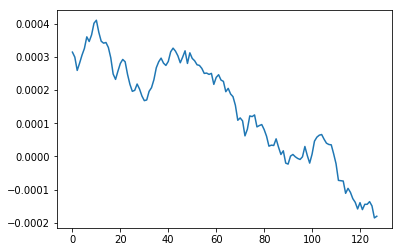

In [3]:
num_points = 128
plt.plot(t[0:num_points], A[0:num_points])
plt.show()

<a id='calcstats'></a>
### <center>Calculando os momentos do ensemble</center>

In [4]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

mean :  0.000244137451172
var  :  7.68228788123e-08
skew :  0.552554516864
kurt :  -0.526957500598


<a id='fitnormdis'></a>
### <center>Fitando uma distribuição normal</center>

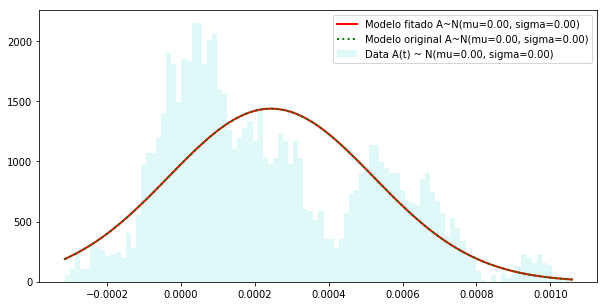

In [5]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdist'></a>
### <center>Fitando uma distribuição lognormal</center>

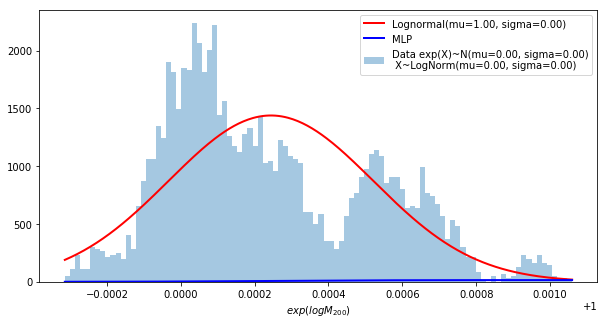

In [6]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.27572050283128752, -0.00075154414848649723, 0.00095853280766207839)
        Fitado			 Original
mean :  0.00024412466715190866 	 0.000244137451172
var  :  7.830336620534376e-08 	 7.68228788123e-08
skew :  0.8653325455765708 	 0.5525545168644652
kurt :  1.3603550915502023 	 -0.5269575005976916


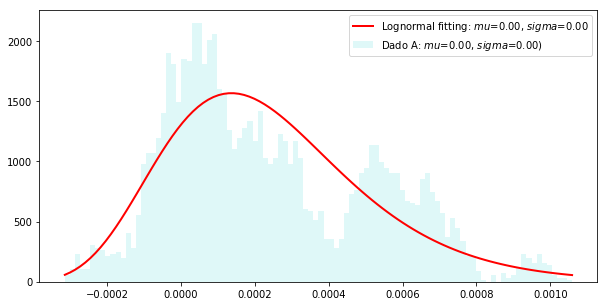

In [7]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfrey'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.000314   max:  0.001059 
median:  0.0001815 
mean:  0.0002441375 
estimated sd:  0.0002772032 
estimated skewness:  0.552757 
estimated kurtosis:  2.473865 



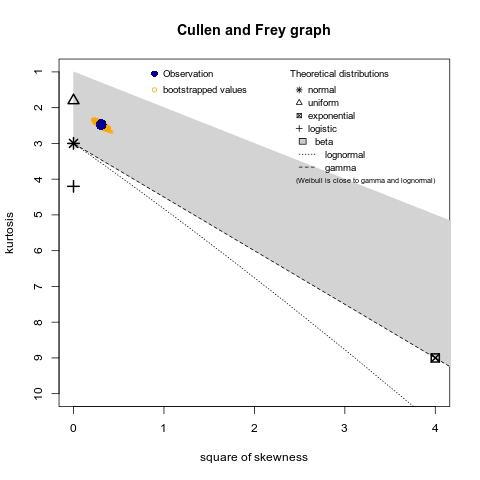

In [8]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)

Image(name+".png")

<a id='fitbestdis'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (3.0229491910543635, 4.1328353893033425, -0.00041399999999999998, 0.0015730000000000002)
        Fitado			 Original
mean :  0.00025051121105308834 	 0.000244137451172
var  :  7.402120291715554e-08 	 7.68228788123e-08
skew :  0.19588729808864974 	 0.5525545168644652
kurt :  -0.5389060385985043 	 -0.5269575005976916


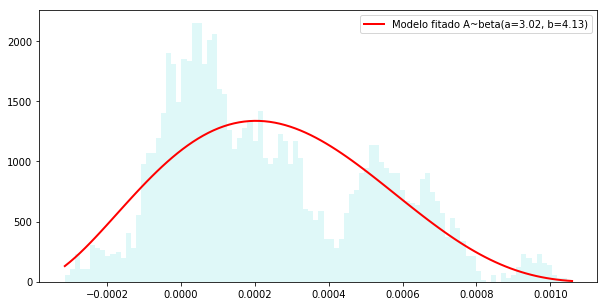

In [9]:
aux.fitting_beta_distribution(A)

<a id='autocorre'></a>
### <center>Calculando autocorrelação</center>

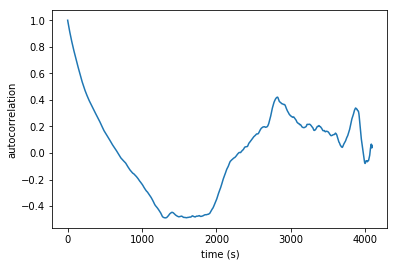

In [10]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfa'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (4096 points): 

First 10 points: [ 0.000314  0.000299  0.000259  0.000281  0.000305  0.000325  0.00036
  0.000346  0.000366  0.000401]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


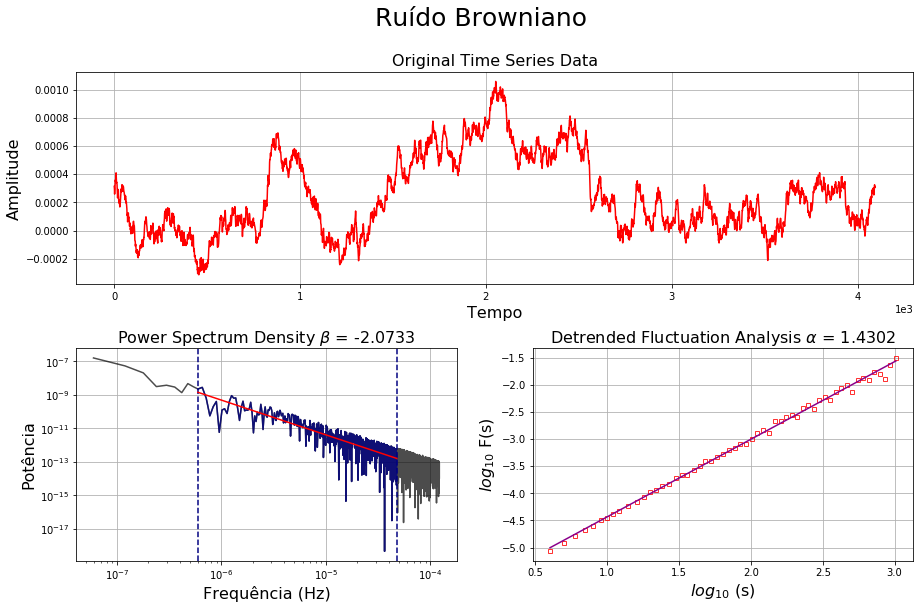

In [11]:
aux.plot_psd_dfa(A, 'Ruído Browniano')

<a id='first'></a>
## <center>Analise dos primeiros 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatsfirst)
* [Distribuição Normal fitada](#fitnormdistfirst)
* [Distribuição Lognormal fitada](#fitlognormdistfirst)
* [Plot do espaço de Cullen-Frey](#cullenfreyfirst)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistfirst)
* [Plot da função de autocorrelação](#autocorrefirst)
* [Plot do PSD e DFS](#psddfafirst)

In [12]:
A = save_A[1024:]
name = "A.ex:1.3.d"
savetxt(name + ".txt", A)

<a id='calcstatsfirst'></a>
### <center>Calculando os momentos do ensemble</center>

In [13]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

mean :  0.000289416015625
var  :  7.60334102643e-08
skew :  0.492223906348
kurt :  -0.656631729673


<a id='fitnormdistfist'></a>
### <center>Fitando uma distribuição normal</center>

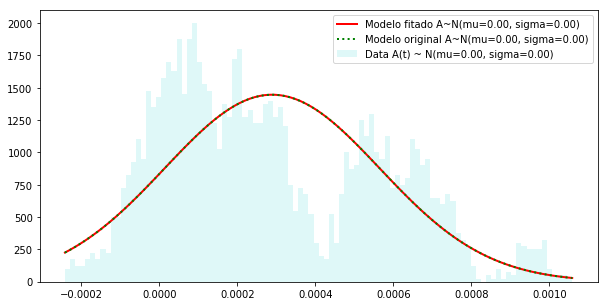

In [14]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistfirst'></a>
### <center>Fitando uma distribuição lognormal</center>

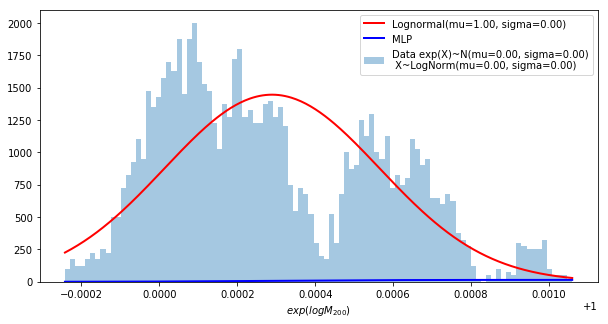

In [15]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.30462333992505852, -0.00061761515411332894, 0.00086619852120198293)
        Fitado			 Original
mean :  0.00028971991823909156 	 0.000289416015625
var  :  8.005119479313776e-08 	 7.60334102643e-08
skew :  0.9658077292738554 	 0.49222390634796254
kurt :  1.703226903562415 	 -0.6566317296729003


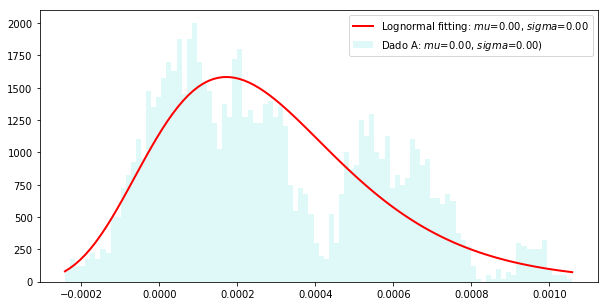

In [16]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreyfirst'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.000242   max:  0.001059 
median:  0.000231 
mean:  0.000289416 
estimated sd:  0.0002757865 
estimated skewness:  0.4924644 
estimated kurtosis:  2.344254 



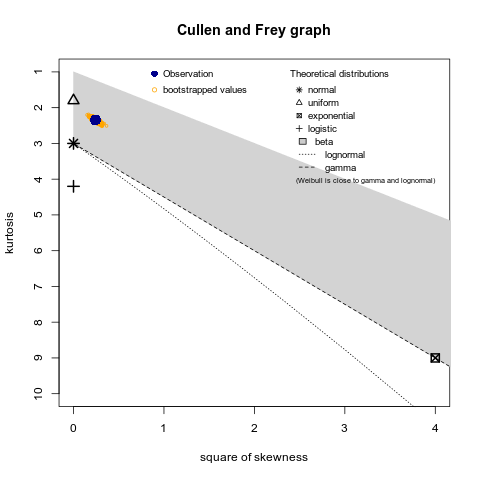

In [17]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistfirst'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (2.7881563991506124, 3.7760423395852598, -0.00034200000000000002, 0.0015010000000000002)
        Fitado			 Original
mean :  0.00029555271918092746 	 0.000289416015625
var  :  7.277613674222103e-08 	 7.60334102643e-08
skew :  0.19554852093283057 	 0.49222390634796254
kurt :  -0.5759779443165691 	 -0.6566317296729003


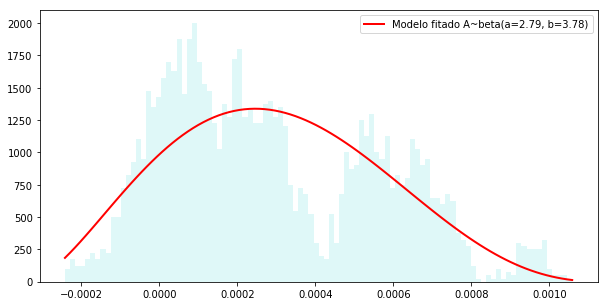

In [18]:
aux.fitting_beta_distribution(A)

<a id='autocorrefirst'></a>
### <center>Calculando autocorrelação</center>

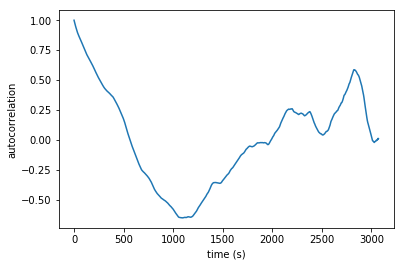

In [19]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfafirst'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (3072 points): 

First 10 points: [ 0.000329  0.000318  0.00031   0.000343  0.000343  0.000331  0.000341
  0.000313  0.000295  0.000311]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


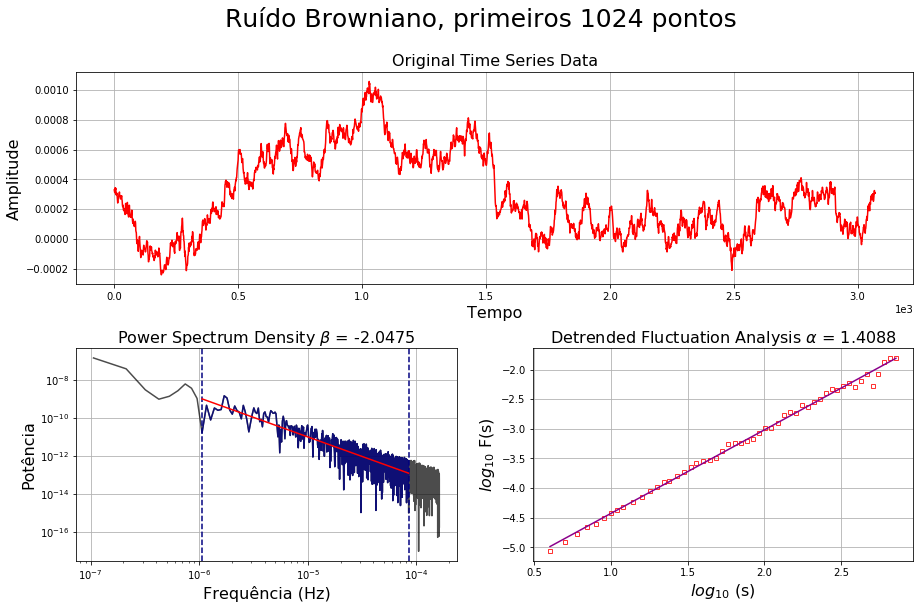

In [20]:
aux.plot_psd_dfa(A, 'Ruído Browniano, primeiros 1024 pontos')

<a id='last'></a>
## <center>Analise dos últimos 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatslast)
* [Distribuição Normal fitada](#fitnormdistlast)
* [Distribuição Lognormal fitada](#fitlognormdistlast)
* [Plot do espaço de Cullen-Frey](#cullenfreylast)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistlast)
* [Plot da função de autocorrelação](#autocorrelast)
* [Plot do PSD e DFS](#psddfalast)

In [21]:
A = save_A[3*1024:4096]
name = "A.ex:1.3.d"
savetxt(name + ".txt", A)

In [22]:
A.shape

(1024,)

<a id='calcstatslast'></a>
### <center>Calculando os momentos do ensemble</center>

In [23]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

mean :  0.000141081054688
var  :  1.57486057348e-08
skew :  0.00889858728318
kurt :  -0.905696021218


<a id='fitnormdistlast'></a>
### <center>Fitando uma distribuição normal</center>

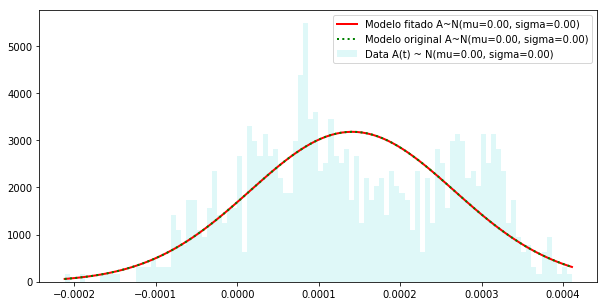

In [24]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistlast'></a>
### <center>Fitando uma distribuição lognormal</center>

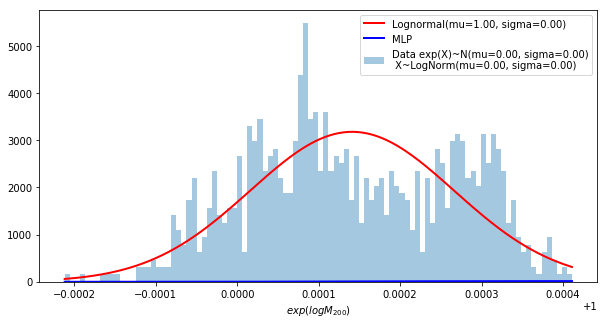

In [25]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.21743451661782692, -0.00045984127487144457, 0.00058727444037858358)
        Fitado			 Original
mean :  0.00014148106232931304 	 0.000141081054688
var  :  1.7505653642840885e-08 	 1.57486057348e-08
skew :  0.6707422453651557 	 0.008898587283178017
kurt :  0.8104548422392481 	 -0.9056960212181342


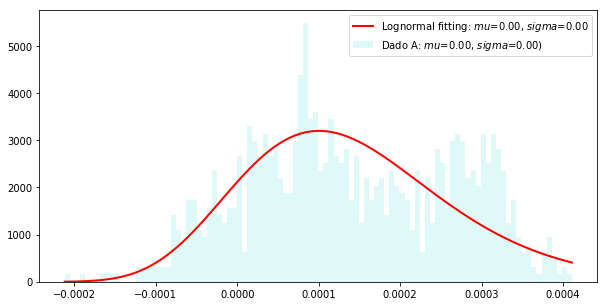

In [26]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreylast'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  -0.000212   max:  0.000411 
median:  0.000127 
mean:  0.0001410811 
estimated sd:  0.0001255548 
estimated skewness:  0.008911647 
estimated kurtosis:  2.095748 



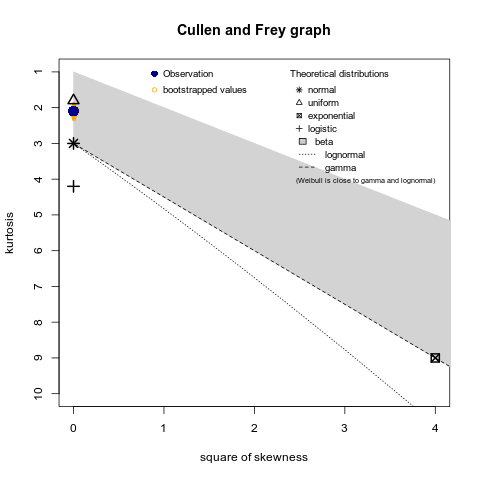

In [27]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistlast'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (5.4657271200783075, 4.4547102501875706, -0.00031199999999999999, 0.00082300000000000006)
        Fitado			 Original
mean :  0.0001414370060444108 	 0.000141081054688
var  :  1.534494744508124e-08 	 1.57486057348e-08
skew :  -0.11360109578211047 	 0.008898587283178017
kurt :  -0.446520983143211 	 -0.9056960212181342


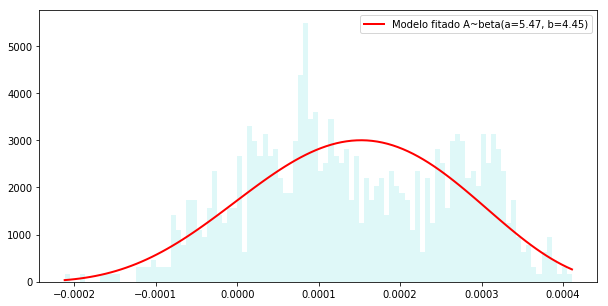

In [28]:
aux.fitting_beta_distribution(A)

<a id='autocorrelast'></a>
### <center>Calculando autocorrelação</center>

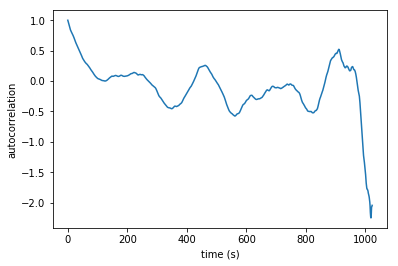

In [29]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfalast'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (1024 points): 

First 10 points: [ -5.30000000e-05  -5.10000000e-05  -5.90000000e-05  -8.10000000e-05
  -8.70000000e-05  -8.80000000e-05  -6.90000000e-05  -4.40000000e-05
  -2.50000000e-05  -2.60000000e-05]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


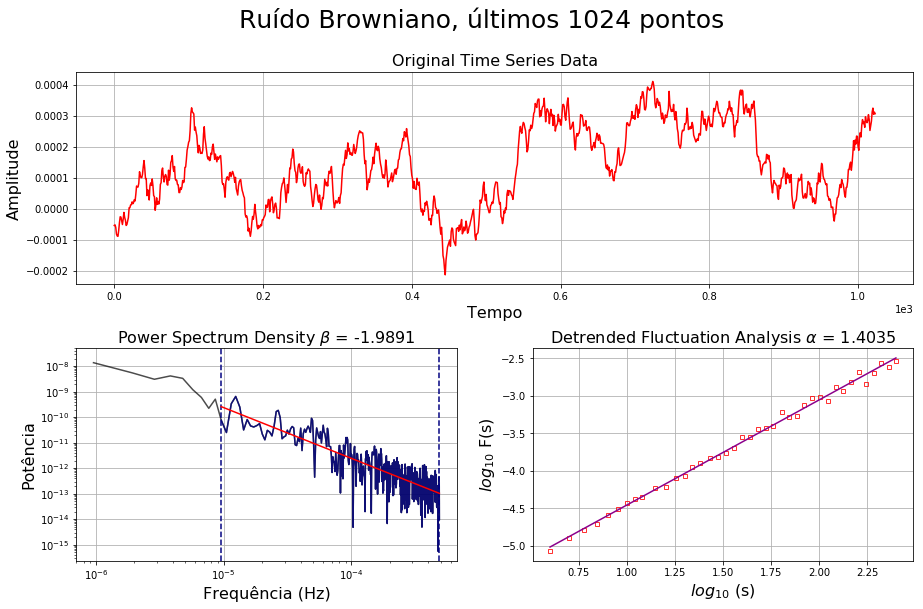

In [30]:
aux.plot_psd_dfa(A, 'Ruído Browniano, últimos 1024 pontos')